In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
path = '/content/drive/MyDrive/Colab Notebooks/Energy Consumption Data.csv'
df = pd.read_csv(path)
print(df.head())

        Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial 

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [11]:
df['Density (P/Km2)'] = df['Density (P/Km2)'].str.replace(',', '')
df['Density (P/Km2)'] = df['Density (P/Km2)'].astype(float)

In [12]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density (P/Km2),Land Area (Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3648.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,223.573191,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,683.463448,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.000000,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,34.000000,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,87.000000,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,219.000000,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,8358.000000,9.984670e+06,64.963051,178.065032


# EDA (Exploratory Data Analysis)

## Correlation Analysis

In [27]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Year                                                              3649 non-null   int64  
 1   Access to electricity (% of population)                           3639 non-null   float64
 2   Access to clean fuels for cooking                                 3480 non-null   float64
 3   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 4   Financial flows to developing countries (US $)                    1560 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 6   Electricity from fossil fuels (TWh)                               3628 non-null   float64
 7   Electricity from nuclear (TWh)   

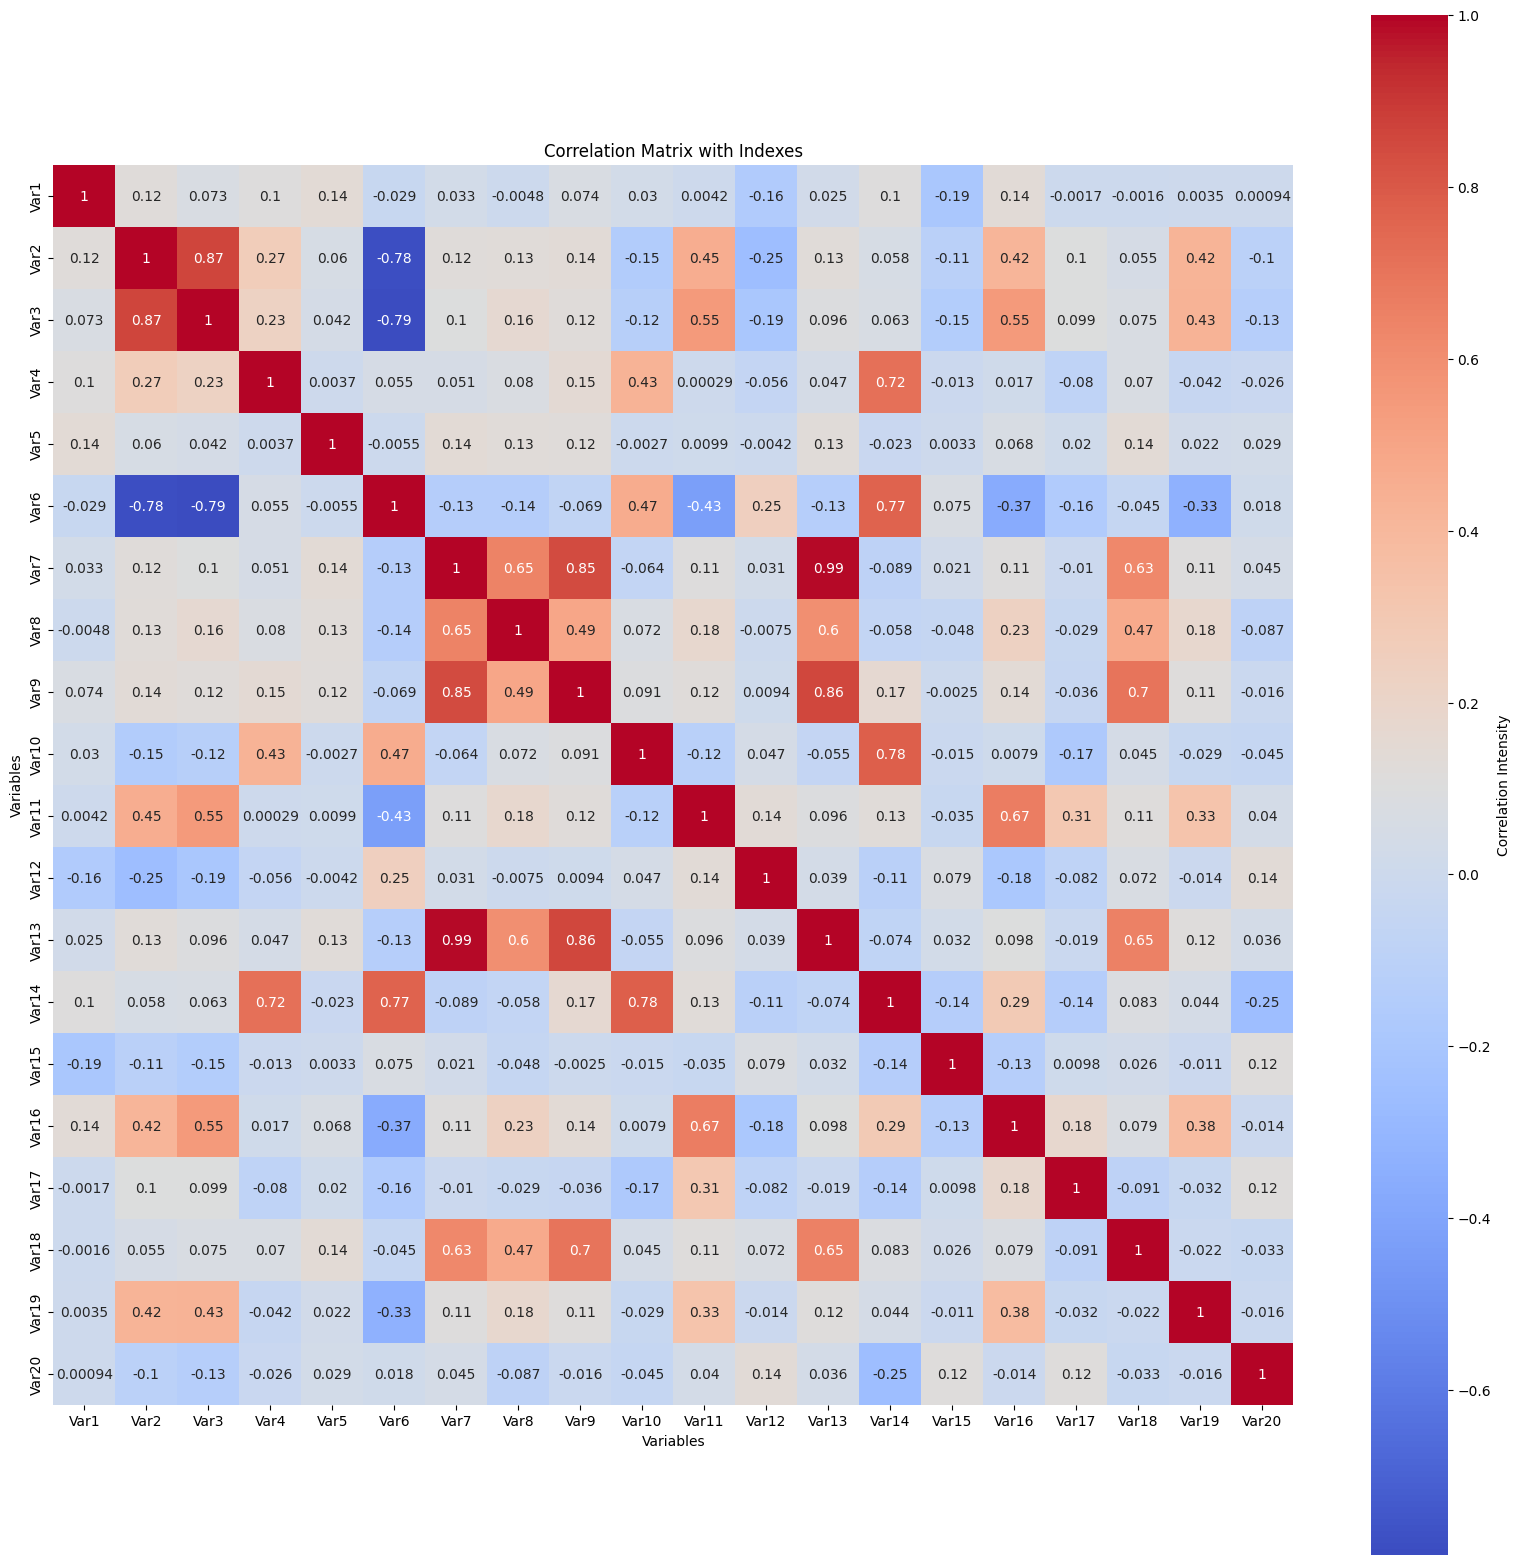

In [32]:
# Calculate pairwise correlations
correlation_matrix = numeric_df.corr()

# Create a dictionary to map long variable names to index numbers
variable_mapping = {name: f"Var{i+1}" for i, name in enumerate(numeric_df.columns)}
index_labels = [variable_mapping[name] for name in numeric_df.columns]

# Plotting the heatmap with color intensity for correlations
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",
            xticklabels=index_labels, yticklabels=index_labels,
            square=True, cbar_kws={'label': 'Correlation Intensity'})

# Title and axis labels
plt.title("Correlation Matrix with Indexes")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

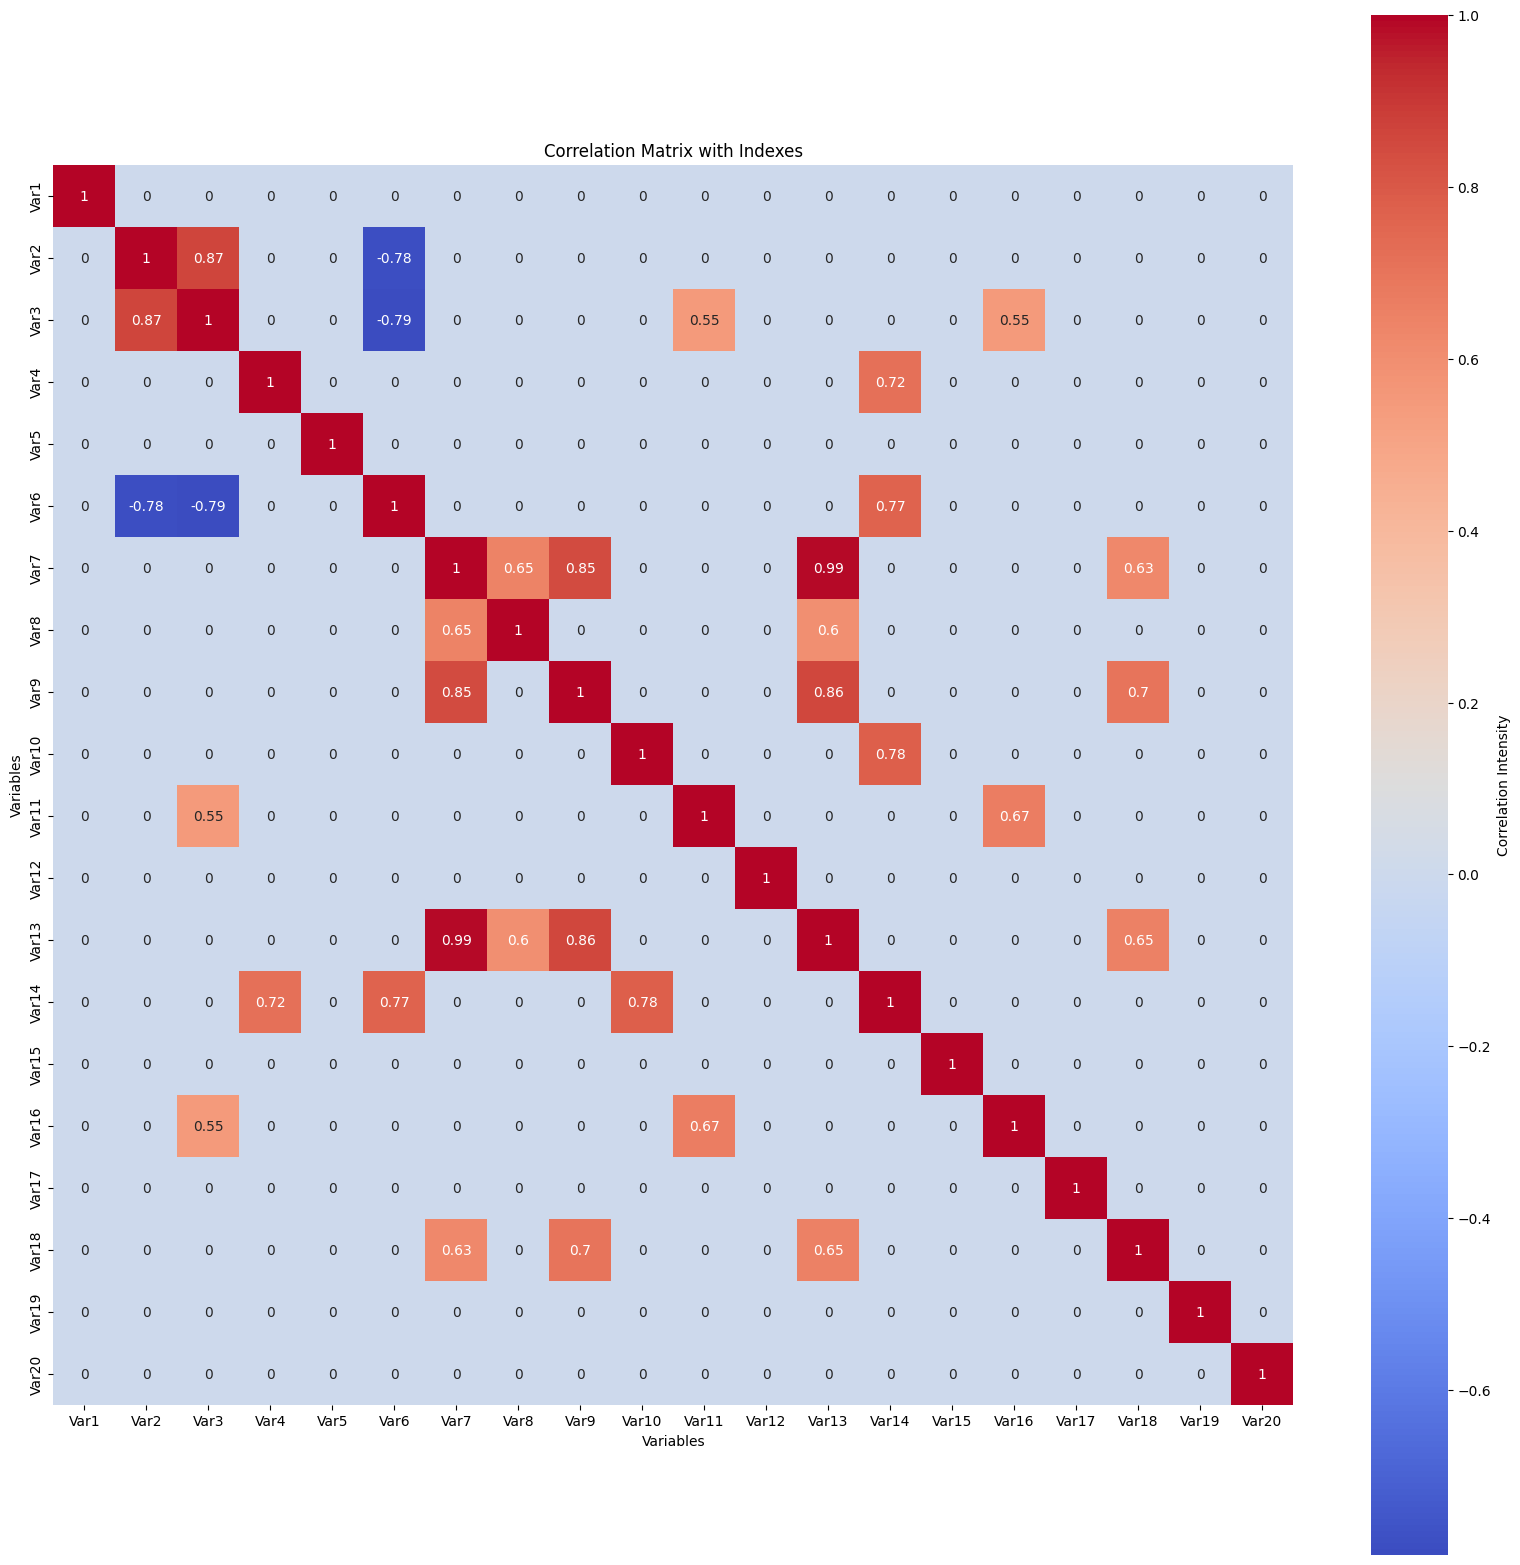

In [37]:
# We filter the small values
filtered_correlation_matrix = correlation_matrix.copy()
filtered_correlation_matrix[np.abs(correlation_matrix) <= 0.5] = 0

plt.figure(figsize=(20, 20))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap="coolwarm",
            xticklabels=index_labels, yticklabels=index_labels,
            square=True, cbar_kws={'label': 'Correlation Intensity'})


plt.title("Correlation Matrix with Indexes")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

In [39]:
threshold = 0.5
correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation_value = correlation_matrix.iloc[i, j]
        if abs(correlation_value) > threshold:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            correlated_pairs.append((abs(correlation_value), f"{var1} is correlated to {var2} with a correlation of {correlation_value:.2f}", correlation_value))

correlated_pairs = sorted(correlated_pairs, key=lambda x: x[0], reverse=True)

for _, description, _ in correlated_pairs:
    print(description)

Electricity from fossil fuels (TWh) is correlated to Value_co2_emissions_kt_by_country with a correlation of 0.99
Access to electricity (% of population) is correlated to Access to clean fuels for cooking with a correlation of 0.87
Electricity from renewables (TWh) is correlated to Value_co2_emissions_kt_by_country with a correlation of 0.86
Electricity from fossil fuels (TWh) is correlated to Electricity from renewables (TWh) with a correlation of 0.85
Access to clean fuels for cooking is correlated to Renewable energy share in the total final energy consumption (%) with a correlation of -0.79
Access to electricity (% of population) is correlated to Renewable energy share in the total final energy consumption (%) with a correlation of -0.78
Low-carbon electricity (% electricity) is correlated to Renewables (% equivalent primary energy) with a correlation of 0.78
Renewable energy share in the total final energy consumption (%) is correlated to Renewables (% equivalent primary energy) w

## PCA (Principal Component Analysis)

Principal Component 1 explains 27.30% of the variance
Principal Component 2 explains 22.45% of the variance
Principal Component 3 explains 17.71% of the variance
Principal Component 4 explains 7.29% of the variance
Principal Component 5 explains 4.91% of the variance
Principal Component 6 explains 4.40% of the variance
Principal Component 7 explains 4.18% of the variance
Principal Component 8 explains 3.44% of the variance
Principal Component 9 explains 2.01% of the variance
Principal Component 10 explains 1.79% of the variance
Principal Component 11 explains 1.21% of the variance
Principal Component 12 explains 1.13% of the variance
Principal Component 13 explains 0.86% of the variance
Principal Component 14 explains 0.42% of the variance
Principal Component 15 explains 0.39% of the variance
Principal Component 16 explains 0.25% of the variance
Principal Component 17 explains 0.15% of the variance
Principal Component 18 explains 0.07% of the variance
Principal Component 19 explains 0.

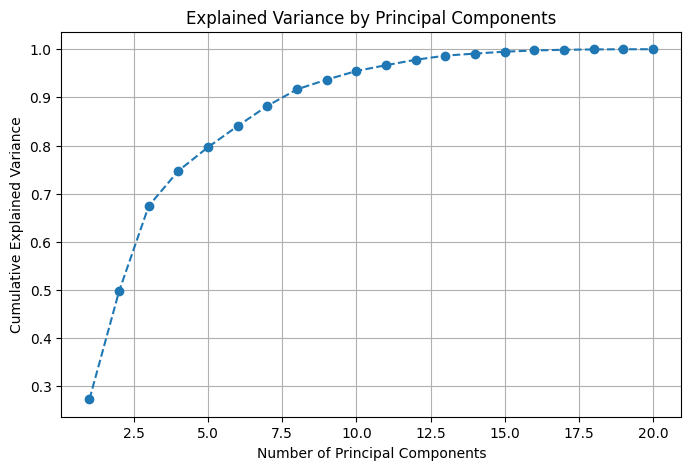

In [42]:
clean_numeric_df = numeric_df.dropna()

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_numeric_df)

# Step 2: Apply PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Step 3: Examine explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Print explained variance for each component
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1} explains {variance:.2%} of the variance")

# Step 4: Plot cumulative variance to determine the number of components to keep
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()